In [20]:
import pandas as pd

# Chargement du fichier CSV
df = pd.read_csv('GLOBAL-ECONOMY-DATASET.csv')

# Affichage des premières lignes du tableau
df.head()


,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN


In [21]:
# Dimensions du jeu de données
print("Dimensions (lignes, colonnes) :", df.shape)

# Noms des colonnes
print("Colonnes :", df.columns.tolist())

# Informations générales (types, non-null, mémoire)
df.info()

# Statistiques descriptives pour les colonnes numériques
df.describe()

# Vérification des valeurs manquantes
df.isnull().sum()


Dimensions (lignes, colonnes) : (300, 10)
Colonnes : [' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ', ' IMF based exchange rate ', ' Population ', ' Currency ', ' Per capita GNI ', ' Agriculture, hunting, forestry, fishing (ISIC A-B) ', ' Changes in inventories ']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0    CountryID                                            300 non-null    int64  
 1    Country                                              300 non-null    object 
 2    Year                                                 300 non-null    int64  
 3    AMA exchange rate                                    300 non-null    float64
 4    IMF based exchange rate                              300 non-null    float64
 5    Population                    

CountryID                                                0
Country                                                  0
Year                                                     0
AMA exchange rate                                        0
IMF based exchange rate                                  0
Population                                               0
Currency                                                 0
Per capita GNI                                           0
Agriculture, hunting, forestry, fishing (ISIC A-B)       0
Changes in inventories                                 116
dtype: int64

In [22]:
# 1. Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# 2. Suppression des lignes avec valeurs manquantes (si nécessaire)
df_cleaned = df.dropna()

# 3. Vérification des types de données
print("\nTypes de données :\n", df_cleaned.dtypes)

# 4. (Optionnel) Conversion de types si nécessaire
# Exemple : convertir une colonne en float
# df_cleaned['GDP'] = df_cleaned['GDP'].astype(float)

# 5. Réinitialiser l'index après suppression de lignes
df_cleaned = df_cleaned.reset_index(drop=True)


Valeurs manquantes par colonne :
 CountryID                                                0
Country                                                  0
Year                                                     0
AMA exchange rate                                        0
IMF based exchange rate                                  0
Population                                               0
Currency                                                 0
Per capita GNI                                           0
Agriculture, hunting, forestry, fishing (ISIC A-B)       0
Changes in inventories                                 116
dtype: int64

Types de données :
 CountryID                                                int64
Country                                                 object
Year                                                     int64
AMA exchange rate                                      float64
IMF based exchange rate                                float64
Population                 

In [24]:

# Création du DataFrame
data = {
    'CountryID': [4, 4, 4, 4, 4, 4, 4, 4],
    'Country': ['Afghanistan'] * 8,
    'Year': [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977],
    'Population': [10752971, 11015857, 11286753, 11575305, 11889879, 12157386, 12425267, 12687301],
    'Currency': ['Afghan'] * 8
}

df = pd.DataFrame(data)

# --- 4.1 Sélection des colonnes ---
colonnes_selectionnees = ['CountryID', 'Country', 'Year', 'Population', 'Currency']
df_selected = df[colonnes_selectionnees]

# Affichage des colonnes sélectionnées
print("\n" + "="*60)
print("ÉTAPE 4 : SÉLECTION ET FILTRAGE DES DONNÉES")
print("="*60)
print("\nA. Colonnes sélectionnées :")
print("-"*40)
print(f"Variables retenues : {', '.join(colonnes_selectionnees)}")
print(f"\nExtrait des données sélectionnées ({len(df_selected)} lignes) :")
print(df_selected.head(3).to_markdown(tablefmt="grid", stralign="center"))

# --- 4.2 Filtrage des données ---
seuil_population = 12_000_000  # Critère de filtrage
df_filtered = df_selected[df_selected['Population'] > seuil_population]

# Affichage des données filtrées
print("\n\nB. Filtrage des données :")
print("-"*40)
print(f"Critère appliqué : Population > {seuil_population:,}")
print(f"\nRésultats filtrés ({len(df_filtered)} lignes retenues) :")
print(df_filtered.to_markdown(tablefmt="grid", stralign="center"))
print("="*60)


ÉTAPE 4 : SÉLECTION ET FILTRAGE DES DONNÉES

A. Colonnes sélectionnées :
----------------------------------------
Variables retenues : CountryID, Country, Year, Population, Currency

Extrait des données sélectionnées (8 lignes) :
+----+-------------+-------------+--------+--------------+------------+
|    |   CountryID |   Country   |   Year |   Population |  Currency  |
+====+=============+=============+========+==============+============+
|  0 |           4 | Afghanistan |   1970 |     10752971 |   Afghan   |
+----+-------------+-------------+--------+--------------+------------+
|  1 |           4 | Afghanistan |   1971 |     11015857 |   Afghan   |
+----+-------------+-------------+--------+--------------+------------+
|  2 |           4 | Afghanistan |   1972 |     11286753 |   Afghan   |
+----+-------------+-------------+--------+--------------+------------+


B. Filtrage des données :
----------------------------------------
Critère appliqué : Population > 12,000,000

Résultat

In [27]:
# Sauvegarder le DataFrame nettoyé et filtré dans un nouveau fichier CSV 
df_filtered.to_csv('cleaned_filtered_data.csv', index=False) 
 
# Sauvegarder les données sous un autre format (par exemple, Excel) 
df_filtered.to_excel('cleaned_filtered_data.xlsx', index=False) 
 
# Confirmation de la sauvegarde 
print("Les données ont été sauvegardées sous 'cleaned_filtered_data.csv' et 'cleaned_filtered_data.xlsx'.")

Les données ont été sauvegardées sous 'cleaned_filtered_data.csv' et 'cleaned_filtered_data.xlsx'.


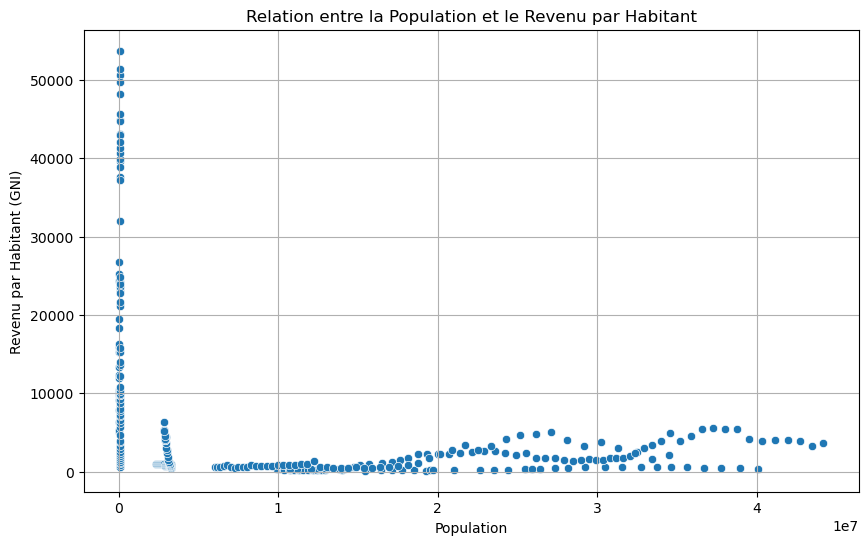

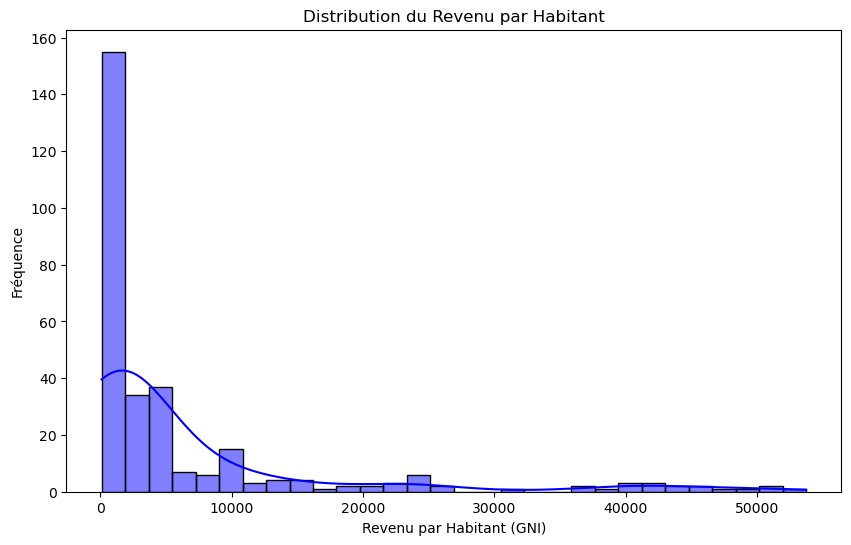

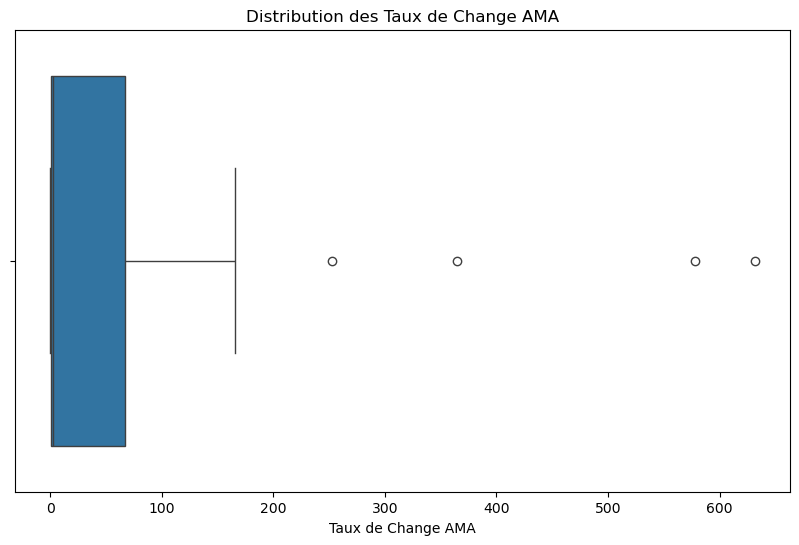

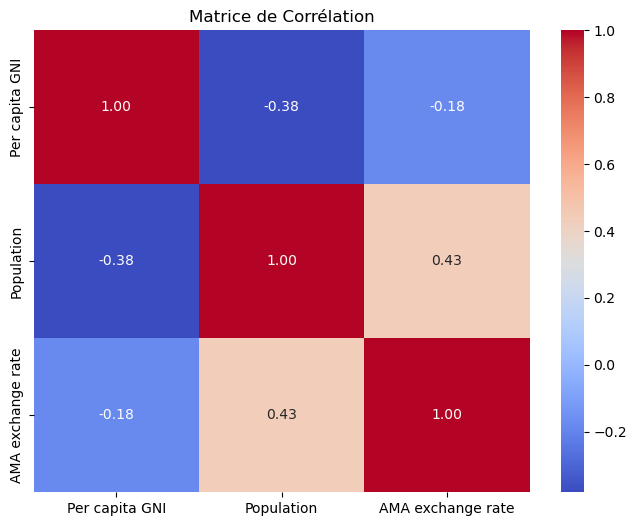

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier CSV
df = pd.read_csv('GLOBAL-ECONOMY-DATASET.csv')

# Nettoyage des noms de colonnes (si nécessaire)
df.columns = df.columns.str.strip()

# Conversion des colonnes pertinentes en numérique
df['Per capita GNI'] = pd.to_numeric(df['Per capita GNI'], errors='coerce')
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
df['AMA exchange rate'] = pd.to_numeric(df['AMA exchange rate'], errors='coerce')

# Suppression des valeurs manquantes
df_cleaned = df.dropna(subset=['Per capita GNI', 'Population', 'AMA exchange rate'])

# 1. Visualisation du revenu par habitant en fonction de la population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Per capita GNI', data=df_cleaned)
plt.title('Relation entre la Population et le Revenu par Habitant')
plt.xlabel('Population')
plt.ylabel('Revenu par Habitant (GNI)')
plt.grid(True)
plt.show()

# 2. Histogramme du revenu par habitant
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Per capita GNI'], kde=True, color='blue', bins=30)
plt.title('Distribution du Revenu par Habitant')
plt.xlabel('Revenu par Habitant (GNI)')
plt.ylabel('Fréquence')
plt.show()

# 3. Boxplot pour visualiser la distribution des taux de change AMA
plt.figure(figsize=(10, 6))
sns.boxplot(x='AMA exchange rate', data=df_cleaned)
plt.title('Distribution des Taux de Change AMA')
plt.xlabel('Taux de Change AMA')
plt.show()

# 4. Heatmap de la matrice de corrélation
corr_matrix = df_cleaned[['Per capita GNI', 'Population', 'AMA exchange rate']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()